In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

In [3]:
train_dataset_path = '/home/ds/DataScience/Datasets/LibriSpeech/LibriSpeech/train-clean-wav/'
test_dataset_path = '/home/ds/DataScience/Datasets/LibriSpeech/LibriSpeech/test-clean-wav/'
train_features_path = '/home/ds/DataScience/Datasets/LibriSpeech/VAELibriSpeech/train-clean-wav/'
test_features_path = '/home/ds/DataScience/Datasets/LibriSpeech/VAELibriSpeech/test-clean-wav/'

In [4]:
FRAME_DURATION = 0.01
STRIDE = 0.1
WINDOW_SIZE = 0.3
def generate_VAE_features(dataset_path, features_path):
    for filename in sorted(os.listdir(dataset_path)):
        print(filename)
        sample_rate, samples = wavfile.read(os.path.join(dataset_path, filename))
        frame_size = int(round(FRAME_DURATION * float(sample_rate)))
        overlap_size = frame_size - int(round((FRAME_DURATION - 0.005) * float(sample_rate)))
        n_fft_points = 2
        while n_fft_points < frame_size:
            n_fft_points *= 2
        frequencies, times, spectrogram = signal.spectrogram(
            samples, fs=sample_rate, window='hamming', nperseg=frame_size, noverlap=overlap_size, nfft=n_fft_points,
            scaling='spectrum', mode='psd'
        )
        n_frames_window = int(frame_size * WINDOW_SIZE)
        new_features = []
        padded_spectrogram = np.hstack((np.zeros((frequencies.shape[0], int(frame_size*STRIDE))),
                                        spectrogram,
                                        np.zeros((frequencies.shape[0], int(frame_size*STRIDE)))))
        for suck_i, time in enumerate(times*STRIDE):
            i = int(suck_i/STRIDE)
            chunk = padded_spectrogram[:, i:int(frame_size * WINDOW_SIZE) + i]
            if chunk.shape == (frequencies.shape[0], int(frame_size*WINDOW_SIZE)):
                new_features += [chunk]
        if new_features != []:
            np.stack(new_features).dump(os.path.join(features_path, filename[:-4]))

In [ ]:
%%time
generate_VAE_features(train_dataset_path, train_features_path)

In [ ]:
%%time
generate_VAE_features(test_dataset_path, test_features_path)

320
512


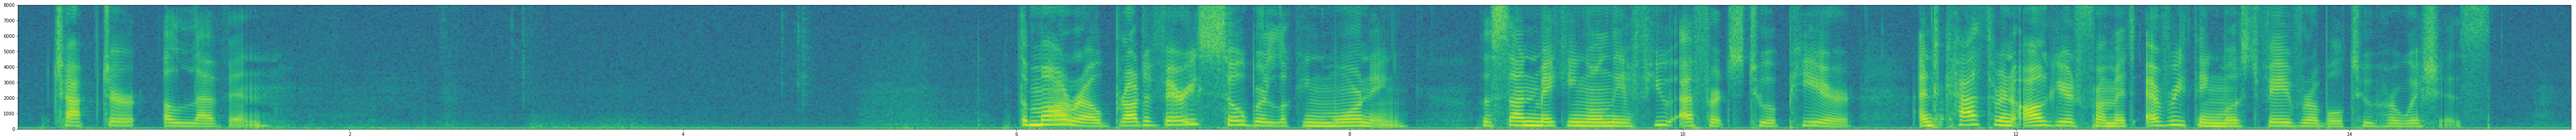

In [12]:
FRAME_DURATION = 0.02

sample_rate, samples = wavfile.read(os.path.join(train_dataset_path, '14-208-0000.wav'))
frame_size = int(round(FRAME_DURATION * float(sample_rate)))
overlap_size = frame_size - int(round((FRAME_DURATION - 0.01) * float(sample_rate)))
print(frame_size)
n_fft_points = 2
while n_fft_points < frame_size:
    n_fft_points *= 2
print(n_fft_points)
frequencies, times, spectrogram = signal.spectrogram(
    samples, fs=sample_rate, window='hanning', nperseg=frame_size, noverlap=overlap_size, nfft=n_fft_points,
    scaling='spectrum', mode='psd'
)
plt.figure(figsize=(100, 5))
plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
plt.savefig('../data/audio.png')
plt.show()

In [10]:
spectrogram.shape

(257, 1533)

In [11]:
len(frequencies)

257

In [7]:
data = np.load('/home/ds/DataScience/Datasets/LibriSpeech/VAELibriSpeech/train-clean-wav/14-208-0000')
data.shape

(306, 48, 129)

In [6]:
FRAME_DURATION = 0.01
STRIDE = 0.1
WINDOW_SIZE = 0.3
words_path = '/home/ds/DataScience/Datasets/LibriSpeech/VAELibriSpeech/test-words-wav'
features_path = '/home/ds/DataScience/Datasets/LibriSpeech/VAELibriSpeech/test-words-feats/'
for filename in sorted(os.listdir(words_path)):
    print(filename)
    sample_rate, samples = wavfile.read(os.path.join(words_path, filename))
    frame_size = int(round(FRAME_DURATION * float(sample_rate)))
    overlap_size = frame_size - int(round((FRAME_DURATION - 0.005) * float(sample_rate)))
    n_fft_points = 2
    while n_fft_points < frame_size:
        n_fft_points *= 2
    frequencies, times, spectrogram = signal.spectrogram(
        samples, fs=sample_rate, window='hamming', nperseg=frame_size, noverlap=overlap_size, nfft=n_fft_points,
        scaling='spectrum', mode='psd'
    )
    n_frames_window = int(frame_size * WINDOW_SIZE)
    new_features = []
    padded_spectrogram = np.hstack((np.zeros((frequencies.shape[0], int(frame_size*STRIDE))),
                                    spectrogram,
                                    np.zeros((frequencies.shape[0], int(frame_size*STRIDE)))))
    for suck_i, time in enumerate(times*STRIDE):
        i = int(suck_i/STRIDE)
        chunk = padded_spectrogram[:, i:int(frame_size * WINDOW_SIZE) + i]
        if chunk.shape == (frequencies.shape[0], int(frame_size*WINDOW_SIZE)):
            new_features += [chunk]
    if new_features != []:
        np.stack(new_features).dump(os.path.join(features_path, filename[:-4]))

already_0.wav
already_1.wav
already_2.wav
close_0.wav
close_1.wav
close_2.wav
doing_0.wav
doing_1.wav
doing_2.wav
mother_0.wav
mother_1.wav
mother_2.wav
window_0.wav
window_1.wav
window_2.wav
